In [1]:
%pylab inline

from tools.issag import Sampler, _random_range_, _rejection_
from tools.issag import Models, iSSAG
import pandas as pd
import seaborn as sns
from scipy.stats import norm

sns.set(style="ticks")
#np.random.seed(sum(map(ord, "axis_grids")))

Populating the interactive namespace from numpy and matplotlib


In [2]:
# chen = Sampler()

# sample = chen.get_samples(size=100)
# sample = chen.get_samples(size=500, pristine=True)
# sample.insert(loc=2, column="tau", value=1.0/sample.gamma*1e9)
# columns = "t_form tau t_trun tau_trun t_burst t_ext".split()
# sample[columns] = sample[columns].apply(log10)
# sample.head(n=10)

# g = sns.PairGrid(sample, vars=["t_form", "tau", "t_trun", "tau_trun", "t_burst", "t_ext"], diag_sharey=False, dropna=False)
# g.map_upper(plt.scatter, **{"s": 7, "lw": 0})
# g.map_lower(sns.kdeplot, cmap="Blues_d", **{"griddsize": 20, "bw": (0.1, 0.1)})
# g.map_diag(sns.kdeplot, lw=2, legend=False)

In [3]:
%%time
library = iSSAG(size=10000)
library.set_all_SEDs()

CPU times: user 2min 2s, sys: 2.94 s, total: 2min 5s
Wall time: 2min 6s


In [4]:
library.sample.head(n=20)
library.sample.loc[0].values

array([2983140488.8771772, 0.70662162258799188, False, nan, nan,
       2725436027.2351961, 214653087.85284585, 0.11222721403512349,
       1.5720187372722565, 2.6662370507500555, 0.047884252005493844,
       93.638373606042393], dtype=object)

In [5]:
# for i in xrange(10):
#     mask = library.SFHs[i]>0.0#np.ones(library.SFHs[i].size, dtype=bool)#
#     figure()
#     library.SFHs[i][mask].plot()

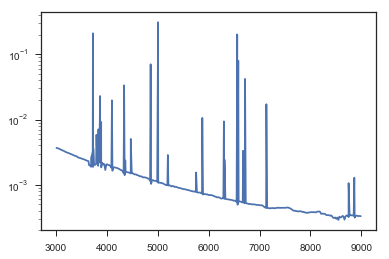

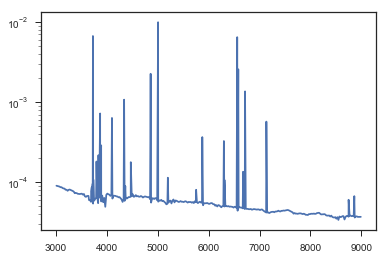

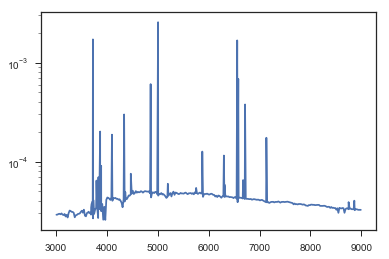

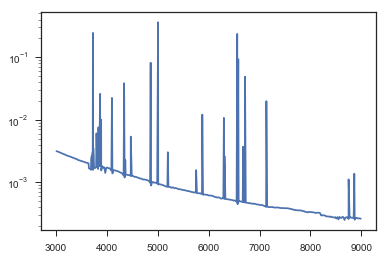

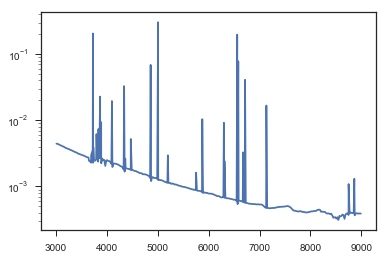

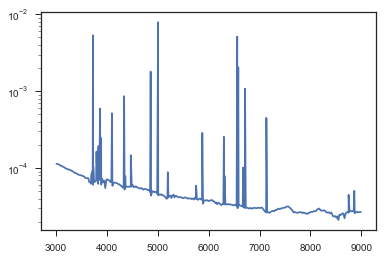

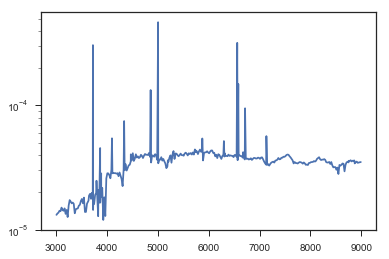

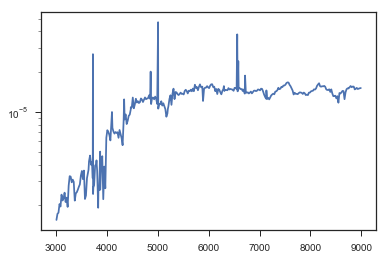

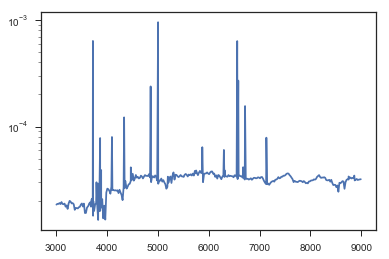

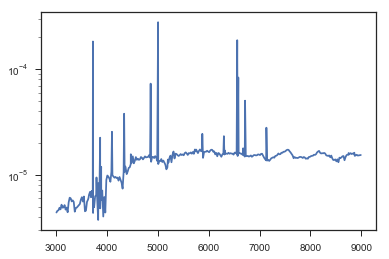

In [7]:
for i in xrange(10):
    mask = (3000 <= library.SEDs[i].index)&(library.SEDs[i].index <= 9000)
    figure()
    library.SEDs[i][mask].plot()
    gca().set_yscale("log")